 ### Bike Sharing Assignment

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some fact

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.ors.



### Reading and Understanding the Data

### Import the libraries

In [590]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
numerical_scaler = MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### # Load the data 

In [593]:
Data_day=pd.read_csv('day.csv')

### # Check the head and shape of the dataset

In [596]:
Data_day.head
Data_day.shape

(730, 16)

# type of Data
Data_day.dtypes

In [599]:
Data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### # Check the descriptive information of data


In [602]:
Data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Columns list
Data_day.columns


# checking the  unique values are present in Data
Data_day.nunique()

#### Cleaning of Data

# checking the  Null values 

In [608]:
Data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### dropping the duplicates

In [611]:
# no duplicate data  found
Data_day.drop_duplicates(inplace=True)

In [613]:
Data_day.shape

(730, 16)

# # dropping the unwanted columns

In [616]:
Data_day.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [618]:
Data_day.shape

(730, 12)

### Visualising the Data

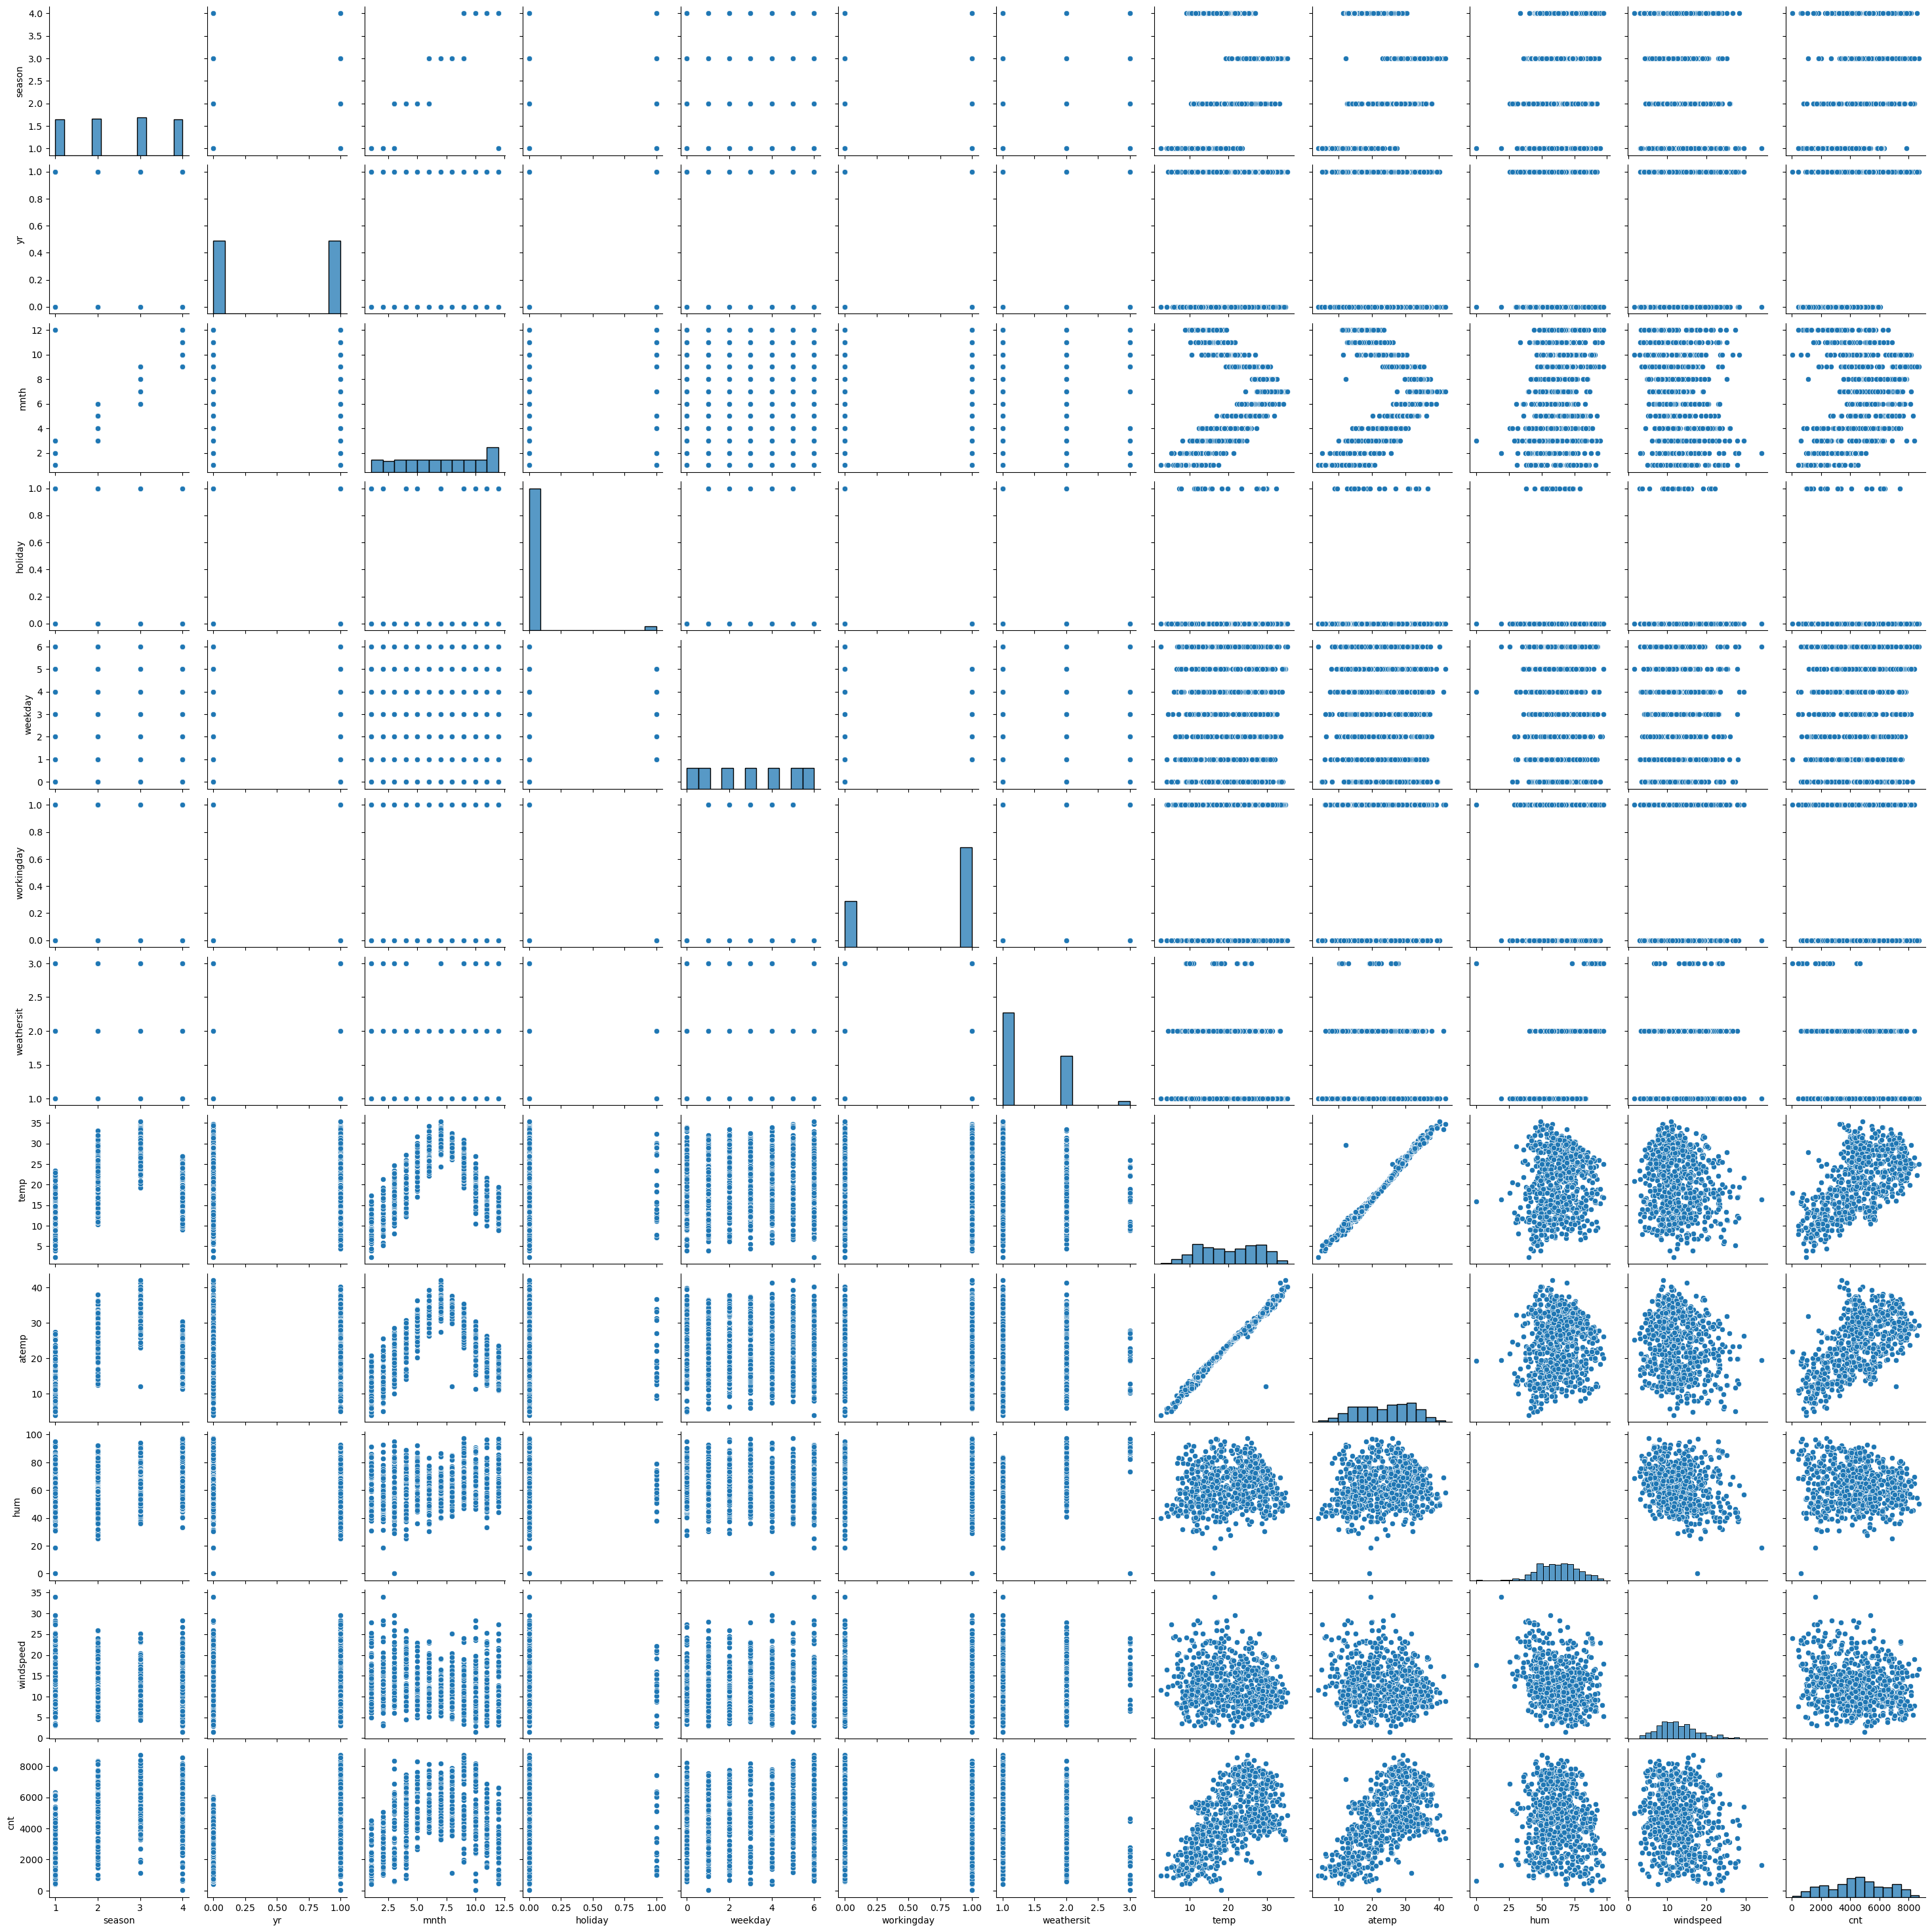

In [621]:
sns.pairplot(Data_day)
plt.show()

## check the column information
Data_day.info()

# visualizing the categorical columns

<Axes: xlabel='weathersit', ylabel='cnt'>

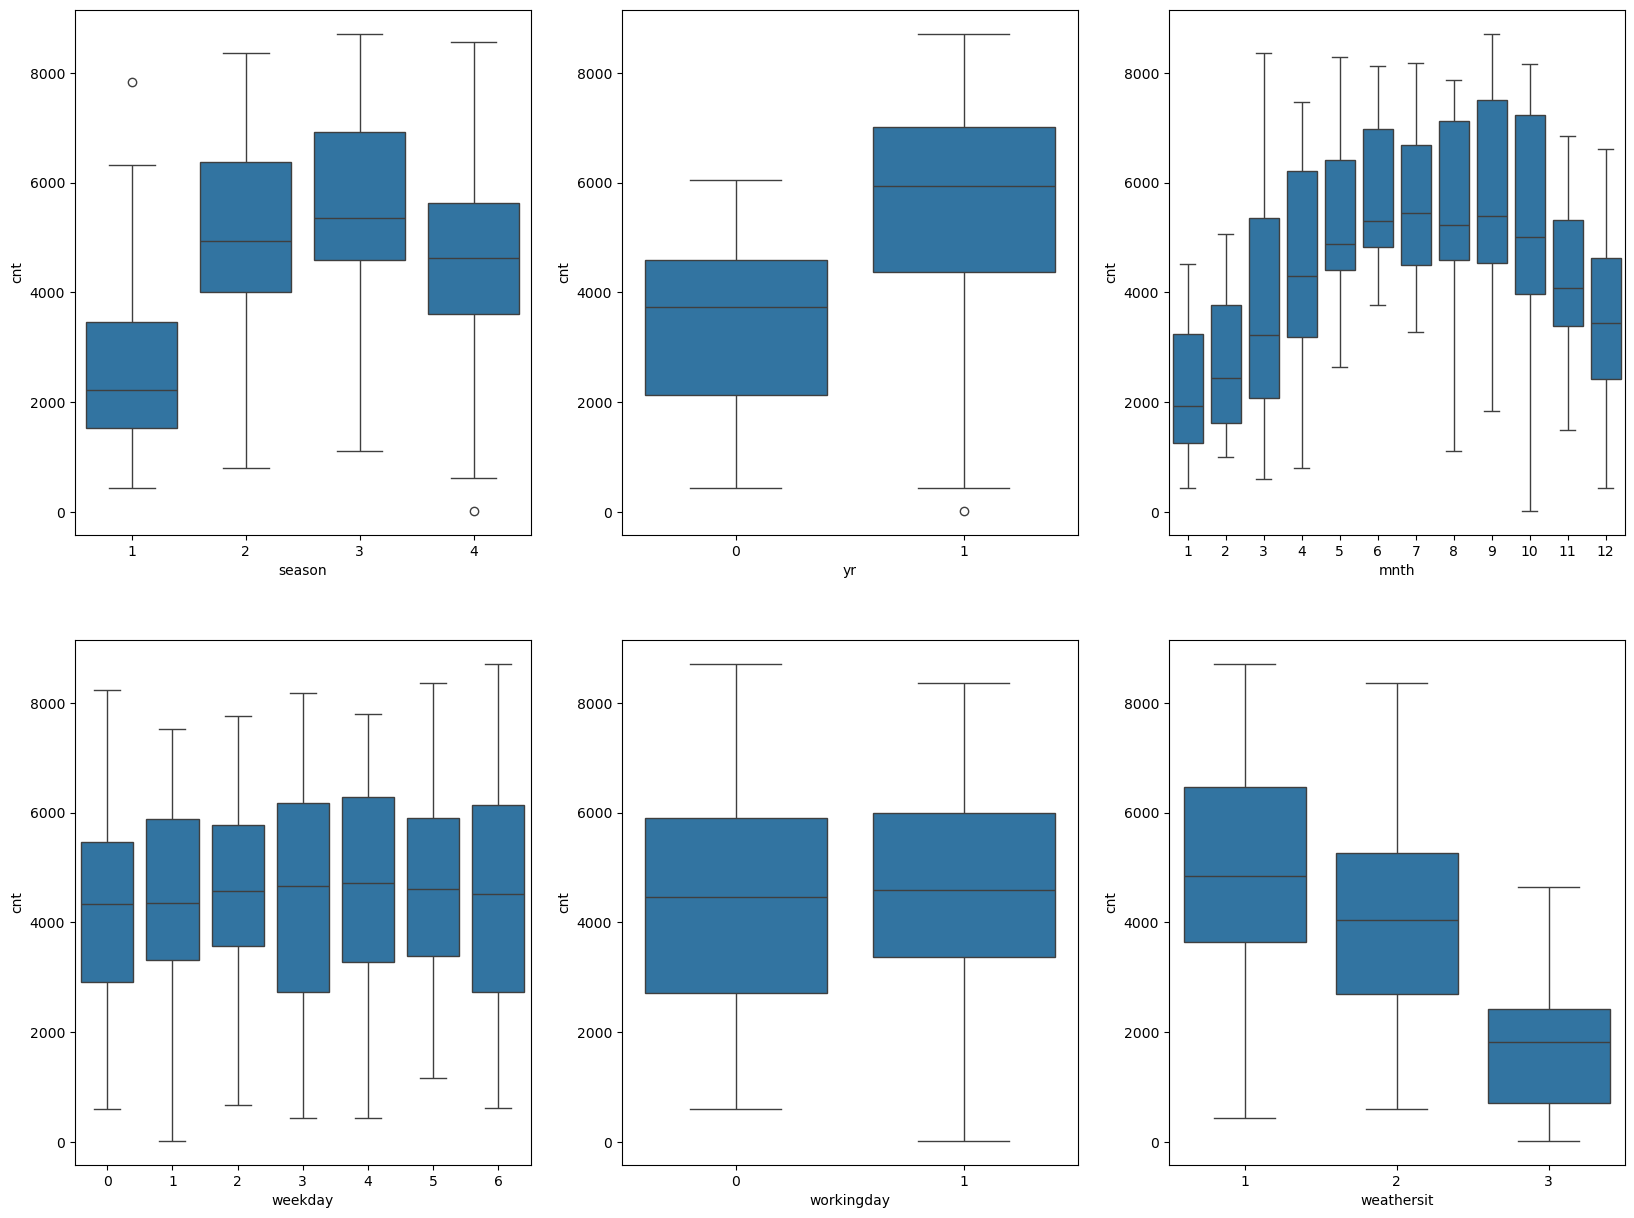

In [624]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=Data_day)


plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=Data_day)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=Data_day)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=Data_day)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=Data_day)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=Data_day)

 ## Heatmap for correlation between numeric variables

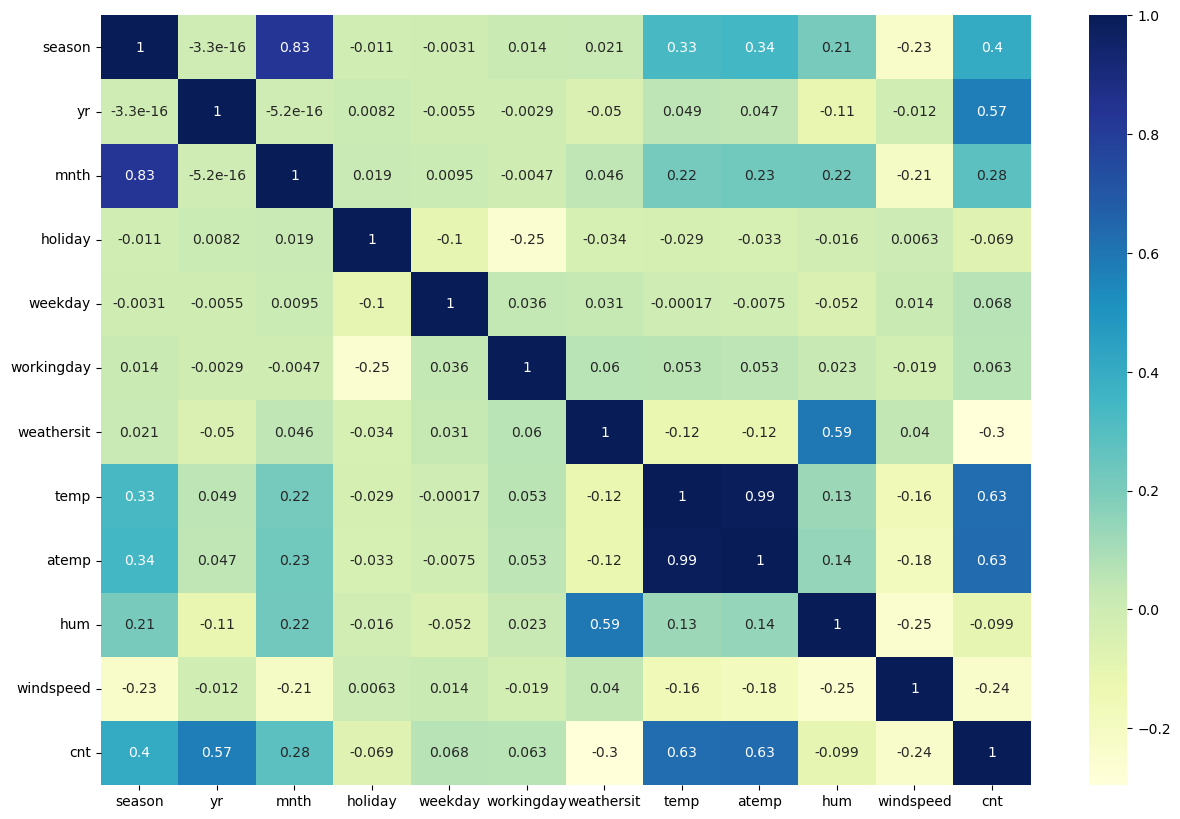

In [626]:
plt.figure(figsize=(15,10))
sns.heatmap(Data_day.corr(),cmap="YlGnBu",annot=True)
plt.show()


## Creating dummy variables for categorical variables

In [628]:
Data_day = pd.get_dummies(data=Data_day,columns=["season","mnth","weekday","weathersit"],drop_first=True, dtype='int64')



In [629]:
Data_day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [630]:
Data_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


 ## Splitting data into train and test data

In [632]:
Data_day.shape

(730, 30)

In [633]:
# X   is remainig independent variables
X=Data_day

In [634]:
np.random.seed(0)
X_train,X_test=train_test_split(Data_day, train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


In [635]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


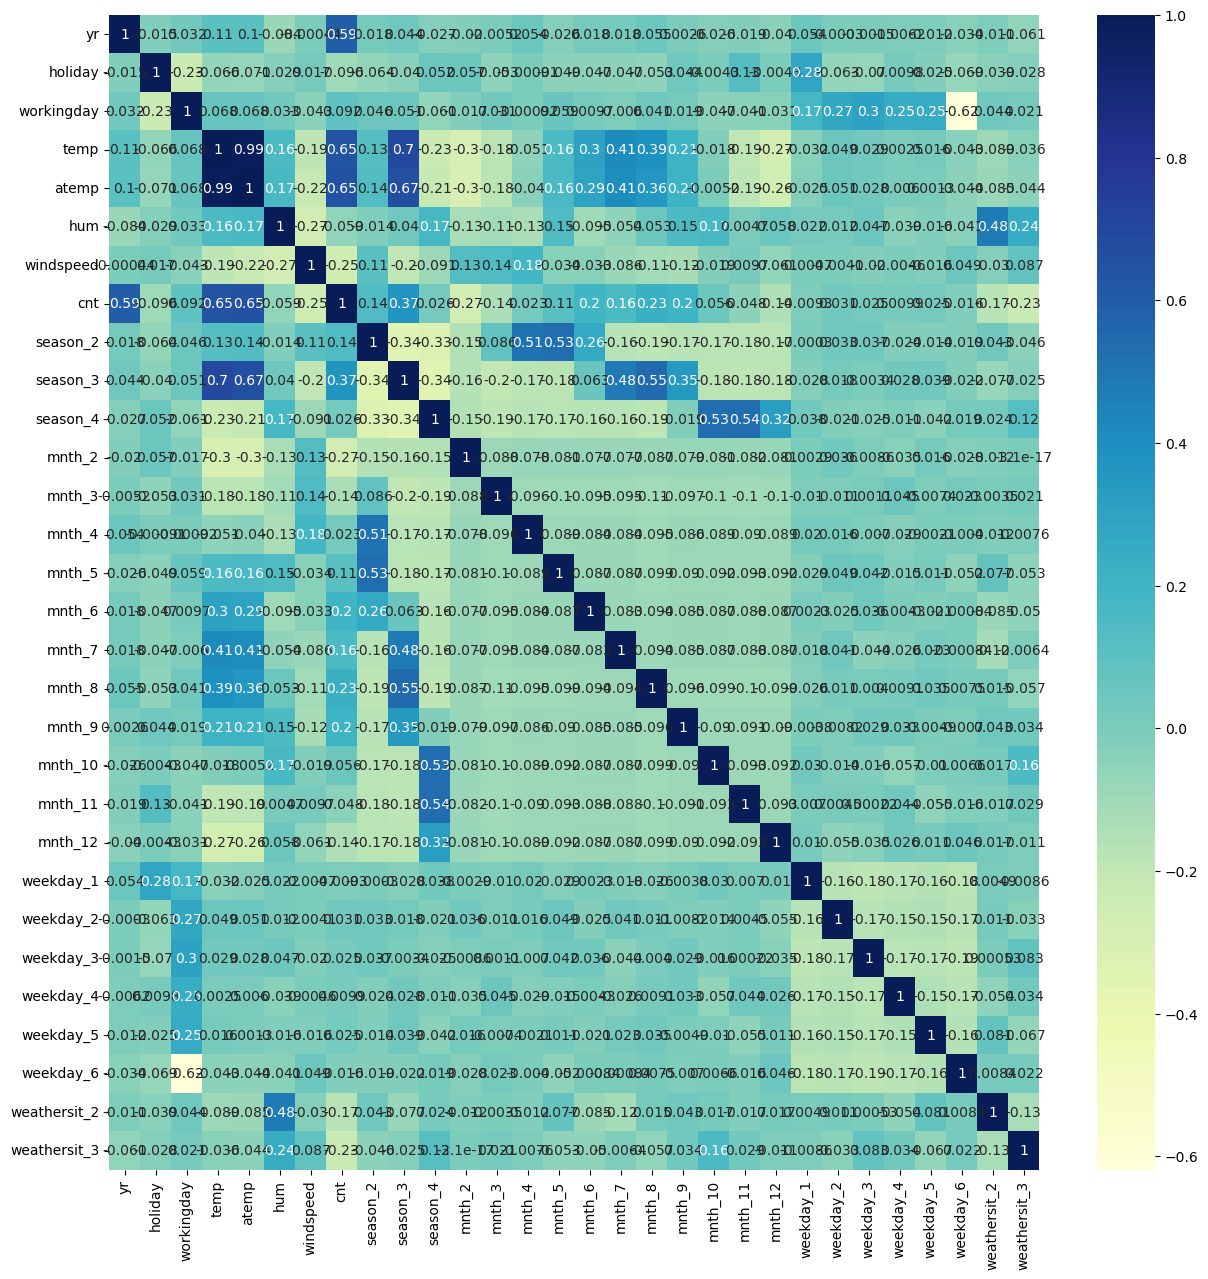

In [636]:
#Checking if the variables are highly correlated
plt.figure(figsize = (15, 15))  
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [637]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


In [638]:
#  Instantiate an object

scaler = MinMaxScaler()

In [639]:
# #create a list of numeric vars

num_vars = ['temp','atemp','hum','windspeed','cnt']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

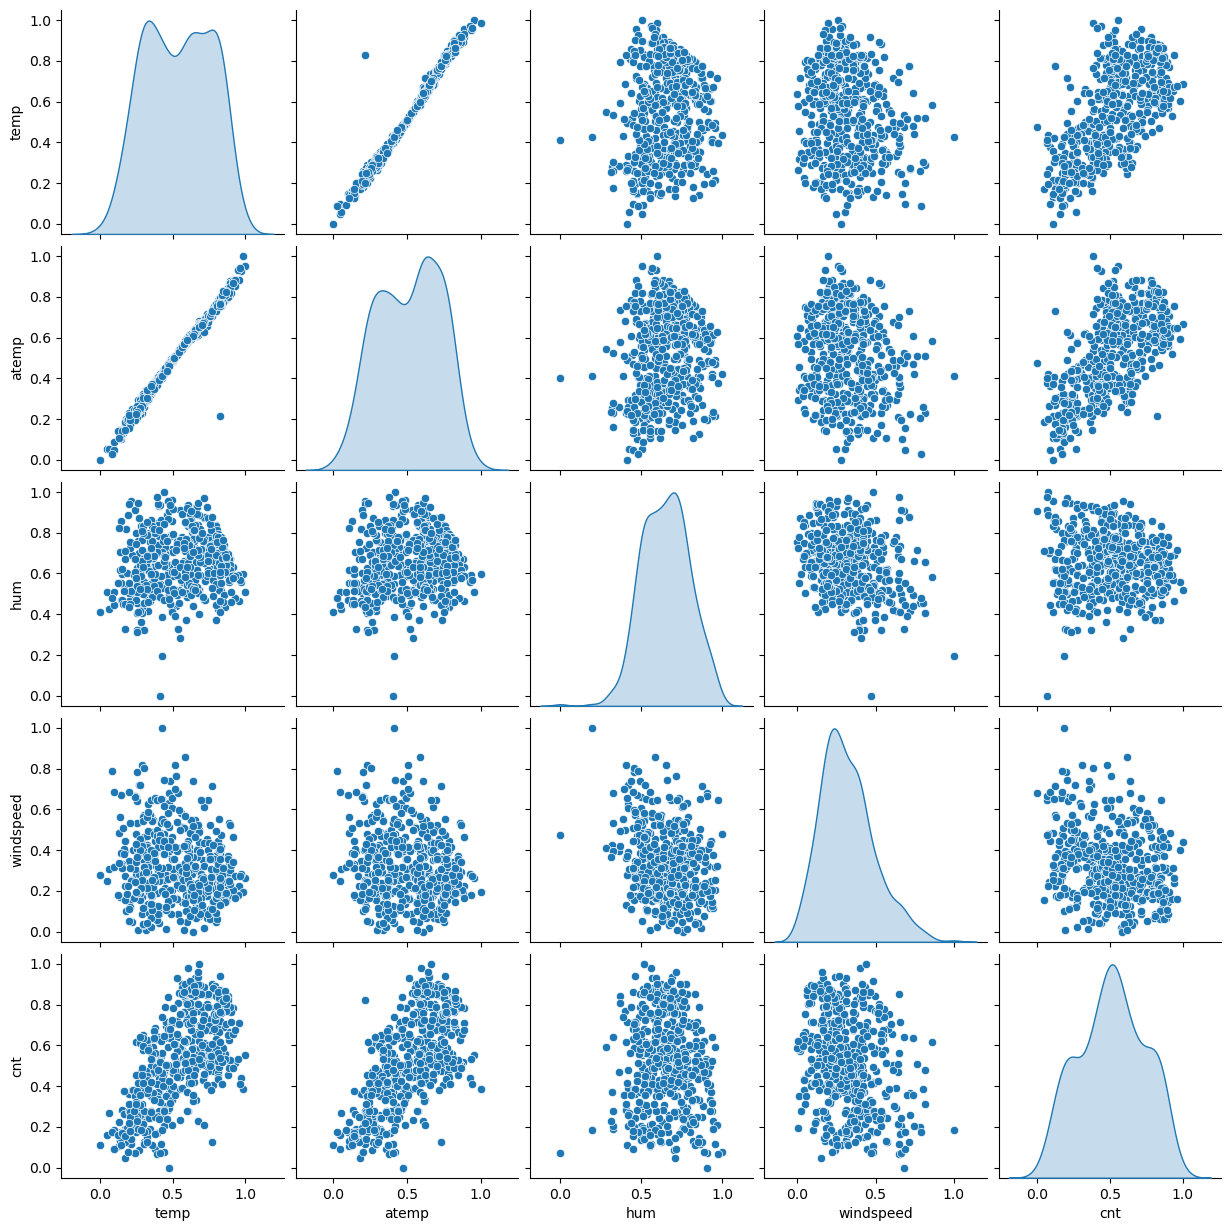

In [640]:
# Create a new dataframe of only numeric variables:

X_train[num_vars]=X_train[num_vars][[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(X_train[num_vars], diag_kind='kde')
plt.show()


In [641]:
# verifying the head after appying scaling.

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [642]:
# describing the dataset

X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [643]:
# fit_transform

In [644]:
X_train[num_vars].describe

<bound method NDFrame.describe of          temp     atemp       hum  windspeed       cnt
576  0.815169  0.766351  0.725633   0.264686  0.827658
426  0.442393  0.438975  0.640189   0.255342  0.465255
728  0.245101  0.200348  0.498067   0.663106  0.204096
482  0.395666  0.391735  0.504508   0.188475  0.482973
111  0.345824  0.318819  0.751824   0.380981  0.191095
..        ...       ...       ...        ...       ...
578  0.863973  0.824359  0.679690   0.187140  0.832835
53   0.202618  0.218747  0.435939   0.111379  0.218017
350  0.248216  0.223544  0.577930   0.431816  0.312586
79   0.462664  0.434043  0.759870   0.529881  0.236424
520  0.600225  0.586515  0.632030   0.359599  0.802922

[510 rows x 5 columns]>

In [645]:
### Step-3 :Training the model

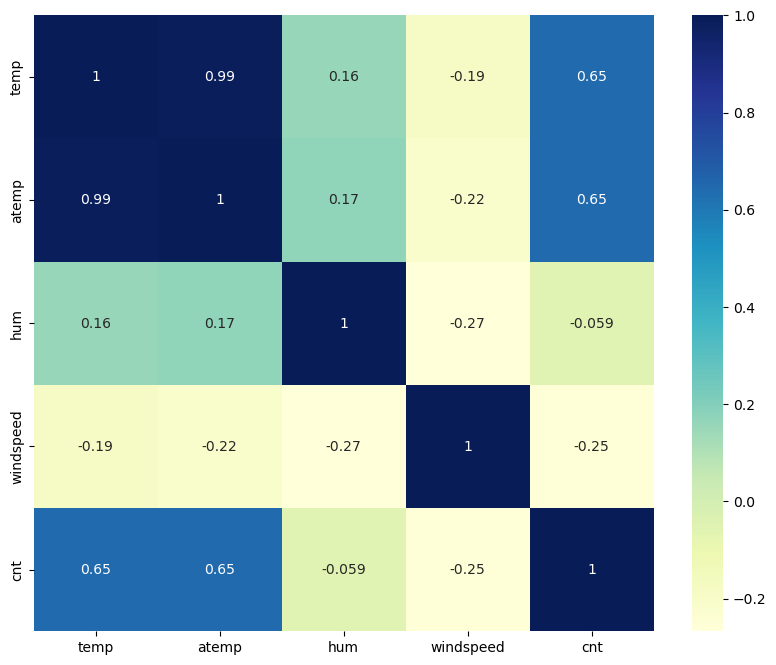

In [646]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [648]:
y_train = X_train.pop('cnt')
X_train = X_train

In [649]:
X_train.head()
# except , hence for pop  'cnt'

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [650]:
y_train.head()
# y for only cnt

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [651]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [652]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)
selector = rfe.fit(X_train,y_train)

In [654]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 14),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 8),
 ('mnth_6', False, 9),
 ('mnth_7', False, 15),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 11),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [655]:
from sklearn.feature_selection import RFE

In [656]:
# Selected Features
col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [657]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [658]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [659]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [660]:
correlation_matrix = X_train_rfe.corr()
print(correlation_matrix)

                    yr   holiday  workingday      temp       hum  windspeed  \
yr            1.000000 -0.014980    0.031808  0.108054 -0.084061  -0.000439   
holiday      -0.014980  1.000000   -0.233863 -0.066405 -0.029224   0.017458   
workingday    0.031808 -0.233863    1.000000  0.068326  0.032525  -0.042704   
temp          0.108054 -0.066405    0.068326  1.000000  0.155252  -0.187281   
hum          -0.084061 -0.029224    0.032525  0.155252  1.000000  -0.267126   
windspeed    -0.000439  0.017458   -0.042704 -0.187281 -0.267126   1.000000   
season_2      0.018294 -0.063798    0.046302  0.126057 -0.014192   0.110441   
season_4     -0.027174  0.051582   -0.060593 -0.234200  0.173980  -0.090740   
mnth_9        0.002574  0.043692    0.019495  0.207212  0.152439  -0.121930   
weekday_1     0.053634  0.279279    0.174565 -0.032455  0.022296  -0.004658   
weekday_2    -0.000296 -0.062897    0.268948  0.048662  0.012087  -0.004101   
weekday_3    -0.001452 -0.070276    0.300501  0.0290

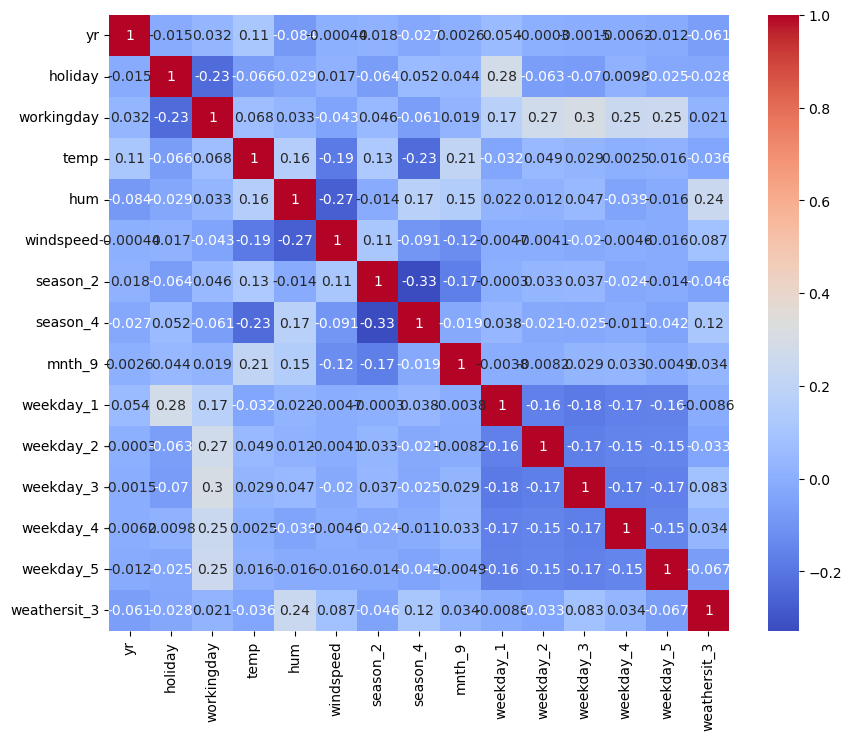

In [661]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

 ## Model 1

In [665]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.96
3,temp,7.20
5,windspeed,3.59


In [666]:
vif['VIF']=vif['VIF'].replace(np.inf,np.nan)

In [667]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [668]:
lr1.params


const           0.257232
yr              0.226910
holiday        -0.067386
workingday      0.023389
temp            0.592082
hum            -0.277927
windspeed      -0.201410
season_2        0.089142
season_4        0.144621
mnth_9          0.104226
weekday_1      -0.017033
weekday_2      -0.015780
weekday_3      -0.003346
weekday_4      -0.006005
weekday_5      -0.001833
weathersit_3   -0.196715
dtype: float64

In [669]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.91e-181
Time:                        19:01:46   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

## Model 2

In [671]:
# Removing the variable 'weekday_5' based on its High p-value -0.873


In [672]:
X_train_new = X_train_rfe.drop(["weekday_5"], axis = 1)


In [673]:
## VIF Check 

In [674]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,10.96
2,workingday,7.44
3,temp,7.20
5,windspeed,3.59
9,weekday_1,2.29
11,weekday_3,2.27
12,weekday_4,2.06
10,weekday_2,2.04
0,yr,2.03
7,season_4,1.64


In [675]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()


In [676]:
# Check the parameters obtained

lr2.params


const           0.257232
yr              0.226910
holiday        -0.069218
workingday      0.021556
temp            0.592082
hum            -0.277927
windspeed      -0.201410
season_2        0.089142
season_4        0.144621
mnth_9          0.104226
weekday_1      -0.015200
weekday_2      -0.013947
weekday_3      -0.001514
weekday_4      -0.004173
weathersit_3   -0.196715
dtype: float64

In [677]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.91e-181
Time:                        19:01:47   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

## Model 3


In [679]:
## Removing the variable 'weekday_3' based on its Very High 'p-value' value.


In [680]:
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)


In [681]:
## VIF Check

In [682]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.96
3,temp,7.20
2,workingday,4.50
5,windspeed,3.59
0,yr,2.03
7,season_4,1.64
9,weekday_1,1.64
6,season_2,1.58
11,weekday_4,1.47
10,weekday_2,1.46


In [683]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [684]:
lr3.params


const           0.257269
yr              0.226899
holiday        -0.069995
workingday      0.020720
temp            0.592086
hum            -0.277953
windspeed      -0.201393
season_2        0.089098
season_4        0.144606
mnth_9          0.104188
weekday_1      -0.014369
weekday_2      -0.013111
weekday_4      -0.003333
weathersit_3   -0.196942
dtype: float64

In [685]:
# Print a summary of the linear regression model obtained
print(lr3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.52e-182
Time:                        19:01:47   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     496   BIC:                            -898.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2573      0.027      9.555   

## Model 4

In [687]:
## Removing the variable 'weekday_4' based on its Very High 'p-value' value.


In [688]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [689]:
 ## VIF Check

In [690]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,10.95
3,temp,7.20
2,workingday,3.73
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.46
10,weekday_2,1.32
1,holiday,1.23


In [691]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [692]:
# Check the parameters obtained

lr4.params


const           0.257028
yr              0.226901
holiday        -0.071325
workingday      0.019664
temp            0.592094
hum            -0.277583
windspeed      -0.201375
season_2        0.089136
season_4        0.144572
mnth_9          0.104120
weekday_1      -0.013281
weekday_2      -0.012064
weathersit_3   -0.197115
dtype: float64

In [693]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.48e-183
Time:                        19:01:47   Log-Likelihood:                 492.87
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     497   BIC:                            -904.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2570      0.027      9.561   

## Model 5

In [695]:
## Removing the variable 'weekday_2' based on its Very High p-value.


In [696]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)


In [697]:
## VIF Check

In [698]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,10.94
3,temp,7.20
5,windspeed,3.58
2,workingday,3.36
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.38
1,holiday,1.22
8,mnth_9,1.20


In [699]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [700]:
# Check the parameters obtained

lr5.params


const           0.257890
yr              0.226903
holiday        -0.073536
workingday      0.016772
temp            0.591567
hum            -0.278185
windspeed      -0.201853
season_2        0.088964
season_4        0.144383
mnth_9          0.104439
weekday_1      -0.010476
weathersit_3   -0.195987
dtype: float64

In [701]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.48e-184
Time:                        19:01:47   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     498   BIC:                            -910.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.601   

## Model 6

In [703]:
# Removing the variable 'weekday_1' based on its High 'p-value'.


In [704]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)


In [705]:
## VIF Check

In [706]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.19
5,windspeed,3.58
2,workingday,3.13
0,yr,2.02
7,season_4,1.64
6,season_2,1.58
8,mnth_9,1.20
9,weathersit_3,1.09
1,holiday,1.08


In [707]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [708]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [709]:
# Check the parameters obtained

lr6.params

const           0.258539
yr              0.226479
holiday        -0.081596
workingday      0.014730
temp            0.592063
hum            -0.279086
windspeed      -0.201938
season_2        0.088797
season_4        0.144104
mnth_9          0.104689
weathersit_3   -0.195694
dtype: float64

In [710]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.19e-185
Time:                        19:01:47   Log-Likelihood:                 492.07
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2585      0.027      9.632   

## Model 7

In [712]:
# Removing the variable 'workingday' based on its High 'p-value'.

In [714]:
## VIF Check

In [715]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.19
5,windspeed,3.58
2,workingday,3.13
0,yr,2.02
7,season_4,1.64
6,season_2,1.58
8,mnth_9,1.20
9,weathersit_3,1.09
1,holiday,1.08


In [717]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [718]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [725]:
# Check the parameters obtained

lr7.params

const           0.268217
yr              0.226845
holiday        -0.091536
temp            0.592835
hum            -0.278436
windspeed      -0.203409
season_2        0.089160
season_4        0.143423
mnth_9          0.105193
weathersit_3   -0.194782
dtype: float64

In [728]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.74e-186
Time:                        19:01:48   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.234   

## Model 8

In [730]:
# Removing the variable 'hum' based on its High 'VIF-value'.

In [731]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,7.11
4,windspeed,3.54
0,yr,2.01
6,season_4,1.64
5,season_2,1.58
7,mnth_9,1.20
8,weathersit_3,1.09
1,holiday,1.04


In [732]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [733]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [736]:
# Check the parameters obtained

lr8.params

const           0.087528
yr              0.233434
holiday        -0.086667
temp            0.568212
windspeed      -0.145477
season_2        0.081150
season_4        0.126067
mnth_9          0.089499
weathersit_3   -0.253491
dtype: float64

In [739]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.22e-172
Time:                        19:01:48   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0875      0.017      5.029   

In [740]:
## F Statistics

In [741]:
# F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

# F-statistic: 256.6
# Prob (F-statistic): 9.22e-172

# The F-Statistics value of 256.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant



In [742]:
## The equation of best fitted surface based on model lr8:
## cnt = 0.268217 + (yr × 0.226845) + (season_2 × 0.089160) + (temp × 0.592835)  + (season2 × 0.082706) + (season4 ×0.143423) + (mnth9 ×0.105193) + (weekday6 ×0.056909) − (holiday × 0.091536)− (hum × 0.278436) − (windspeed ×0.203409)− (weathersit_3 ×0.194782)



## ASSUMPTIONS

In [744]:
## Error terms are normally distributed with mean zero (not X, Y)

In [745]:
## Residual Analysis Of Training Data


In [746]:
y_train_pred = lr8.predict(X_train_lm8)


Text(0.5, 0, 'Errors')

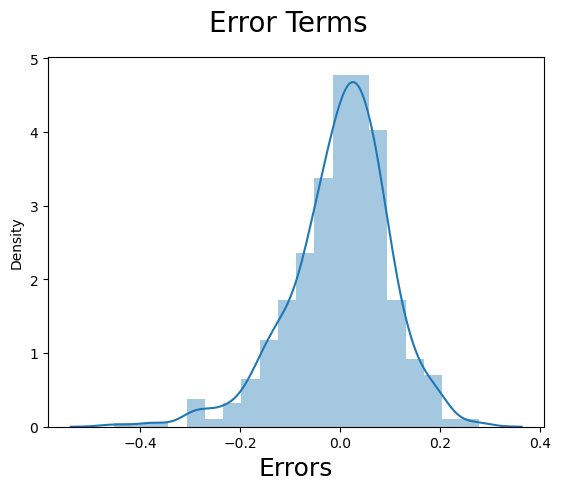

In [747]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


In [748]:
## Insights

In [749]:
## From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.


In [750]:
## There is a linear relationship between X and Y

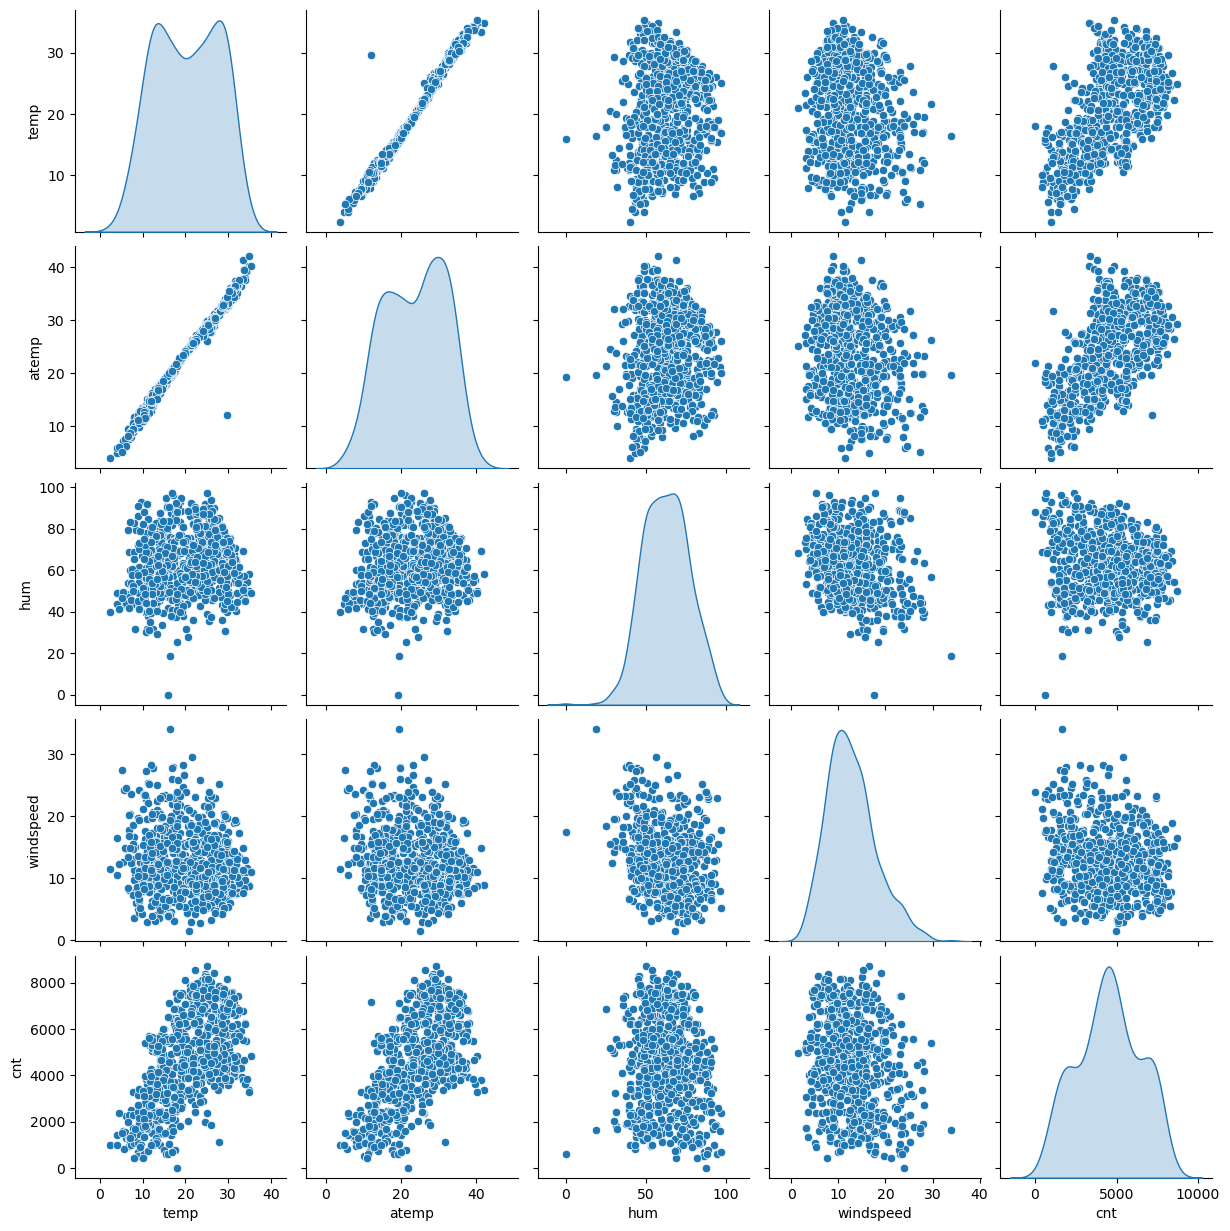

In [751]:
Data_day=Data_day[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(Data_day, diag_kind='kde')
plt.show()

In [752]:
# Insight

In [759]:
# Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.


In [773]:
 ## There is No Multicollinearity between the predictor variables¶

In [774]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.34
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


In [776]:
## MAKING PREDICTION USING FINAL MODEL¶

In [790]:
 ## Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr8)

In [804]:
## Applying the scaling on the test sets

In [821]:
# verifying the head after appying scaling.

X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [827]:
# create a list of numeric vars

num_vars = ['temp','atemp','hum','windspeed','cnt']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [834]:
X_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [842]:
## Dividing into X_test and y_tes

In [847]:
y_test = X_test.pop('cnt')
X_test = X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    int64  
 8   season_3      220 non-null    int64  
 9   season_4      220 non-null    int64  
 10  mnth_2        220 non-null    int64  
 11  mnth_3        220 non-null    int64  
 12  mnth_4        220 non-null    int64  
 13  mnth_5        220 non-null    int64  
 14  mnth_6        220 non-null    int64  
 15  mnth_7        220 non-null    int64  
 16  mnth_8        220 non-null    int64  
 17  mnth_9        220 non-null    int64  
 18  mnth_10       220 non-null    int

In [848]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()


<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    int64  
 6   season_4      220 non-null    int64  
 7   mnth_9        220 non-null    int64  
 8   weathersit_3  220 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 17.2 KB


In [849]:
# Making predictions using the final model (lr8)

y_pred = lr8.predict(X_test_lm8)


In [850]:
## MODEL EVALUATION

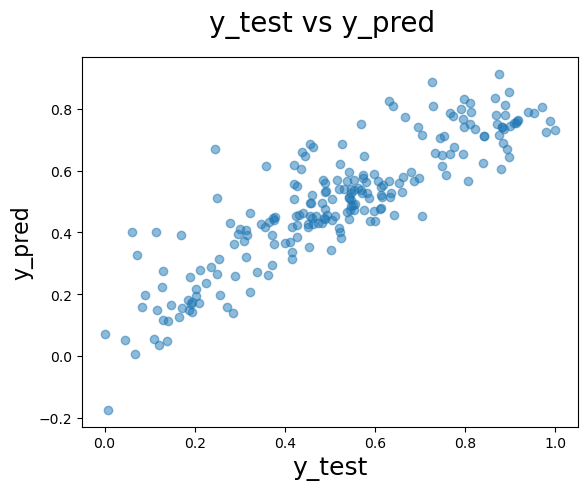

In [851]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [852]:
 ## R^2 Value for TEST

In [853]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7619337869611894

In [854]:
## Adjusted R^2 Value for TEST

In [855]:
# We already have the value of R^2 (calculated in above step)

r2=0.7619337869611894

In [856]:
# Get the shape of X_test
X_test.shape

(220, 8)

In [857]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7529075798317558

## Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.804
    - Test dataset R^2           : 0.762
    - Train dataset Adjusted R^2 : 0.801    
    - Test dataset Adjusted R^2  : 0.753
